# CSCI4022 Homework 1; Review

## Due Tuesday, September 7 at 11:59 pm to Canvas and Gradescope

#### Submit this file as a .ipynb with *all cells compiled and run* to the associated dropbox.

***

Your solutions to computational questions should include any specified Python code and results as well as written commentary on your conclusions.  Remember that you are encouraged to discuss the problems with your classmates, but **you must write all code and solutions on your own**.

**NOTES**: 

- Any relevant data sets should be available on Canvas. To make life easier on the graders if they need to run your code, do not change the relative path names here. Instead, move the files around on your computer.
- If you're not familiar with typesetting math directly into Markdown then by all means, do your work on paper first and then typeset it later.  Here is a [reference guide](https://math.meta.stackexchange.com/questions/5020/mathjax-basic-tutorial-and-quick-reference) linked on Canvas on writing math in Markdown. **All** of your written commentary, justifications and mathematical work should be in Markdown.  I also recommend the [wikibook](https://en.wikibooks.org/wiki/LaTeX) for LaTex.
- Because you can technically evaluate notebook cells is a non-linear order, it's a good idea to do **Kernel $\rightarrow$ Restart & Run All** as a check before submitting your solutions.  That way if we need to run your code you will know that it will work as expected. 
- It is **bad form** to make your reader interpret numerical output from your code.  If a question asks you to compute some value from the data you should show your code output **AND** write a summary of the results in Markdown directly below your code. 
- 45 points of this assignment are in problems.  The remaining 5 are for neatness, style, and overall exposition of both code and text.
- This probably goes without saying, but... For any question that asks you to calculate something, you **must show all work and justify your answers to receive credit**. Sparse or nonexistent work will receive sparse or nonexistent credit. 
- There is *not a prescribed API* for these problems.  You may answer coding questions with whatever syntax or object typing you deem fit.  Your evaluation will primarily live in the clarity of how well you present your final results, so don't skip over any interpretations!  Your code should still be commented and readable to ensure you followed the given course algorithm.


---
**Shortcuts:**  [Problem 1](#p1) | [Problem 2](#p2) | [Problem 3](#p3) |
---

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

[Back to top](#top)
<a/ id='p1'></a>

## Problem 1 (Numerics... kind of; 11 points)
***
####  a) Solve for $b$ in the matrix-vector product $$\begin{bmatrix}a_1 & a_2 \\ a_3 & a_4\end{bmatrix} \cdot \begin{bmatrix}x_1\\ x_2\end{bmatrix}=b.$$

####  How many computations does this take, if each multiplication and addition is counted as a separate computation?  

 #### What about for

$$\begin{bmatrix}a_1 & a_2 &a_3 \\ a_4 & a_5 &a_6 \\ a_7&a_8&a_9 \end{bmatrix} \cdot \begin{bmatrix}x_1\\ x_2\\x_3\end{bmatrix}=b?$$

Use the following markdown cell to show all work in computing the exact answer.


**Solution**:

### (2x2) . (2x1)
a1*x1 + a2*x2 
a3*x1 + a4*x2

6 computations

### (3x3) . (3x1)
a1*x1 + a2*x2 + a3*x3
a4*x1 + a5*x2 + a6*x3
a7*x1 + a8*x2 + a9*x3

Each row can be computed using 5 operations. Total of 3 rows. So 15 operations.


####  b) How many computations does matrix-vector computation take if the matrix $A$ is a square $n \times n$ matrix and the vector $x$ is $n \times 1$? 

Visually:

$$\begin{bmatrix} 
    a_{11} & a_{12} & \dots \\
    \vdots & \ddots & \\
    a_{n1} &        & a_{nn} 
    \end{bmatrix}  \cdot \begin{bmatrix}x_1\\ \vdots \\x_n\end{bmatrix}=b$$

Use the following markdown cell to show all work in computing the exact answer.


**Solution**:

The pattern from before:
- Each entry requires us dot product a row of A with the column x... which is n multiplications separated by (n-1) additions.
- There are n such rows to compute, so we multiply:

Total = $n\cdot (n+n-1)$


#### c) How many computations does square matrix-matrix multiplication take if each matrix is $n \times n$? 

For example:

$$\begin{bmatrix} 
    a_{11} & a_{12} & \dots \\
    \vdots & \ddots & \\
    a_{n1} &        & a_{nn} 
    \end{bmatrix} \cdot 
    \begin{bmatrix} 
    b_{11} & b_{12} & \dots \\
    \vdots & \ddots & \\
    b_{n1} &        & b_{nn} 
    \end{bmatrix}=C$$
    
Hint: how many computations for the entry $c_{ij}$ in row $i$, column $j$?

If $n=10^4$, what number is this?

**solution:**

Again we have dot products for each entry of matrix C: a row of A and a column of B.  But now, we have $n^2$ entries of $C$, making the total $n^2\cdot (n+n-1)= n^2(2n-1)= 2n^3-n^2$.

If n is 10,000, this is... pretty big:
$$2 \cdot 10^{12} + 10^8= 1,999,900,000,000$$
or a "little" under 2 trillion.

[Back to top](#top)
<a/ id='p2'></a>

## Problem 2 (Visualizations and Dimension Reduction; 17 points)
***


The Zeiss Xradia x-ray microscope (XRM) that lives in the basement of engineering is a pretty cool device that forms 3-dimensional reconstructions of scanned objects by bombaring them with light and recording the resulting intensity/light interference of the resulting object.  As one stage in processing, each object is reduced into a large number of "voxels" and their resulting intensities.  In this problem we take a reduced set of data of this form and convert the "voxels" into point locations (in micrometers) and visualize the results.

The University of Colorado Museum of Natural History is currently using the XRM to catalogue and save some of their artifacts, as well as allow for the possibility of 3-D digital printings and reconstructions.  We've been given access to some of their data!

The following should load in the data, make it an `np.array` instead of a data frame, and create a **projection**, where data from one dimension is entirely exluded.  In this case, we're taking all of the "Z" values that were in third column of `mat` and "projecting" them onto the X-Y plane for a nice and easy-to-see scatter plot.

Clearly these aren't random points, but what **is** this thing?

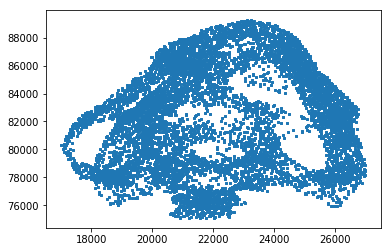

In [2]:
dat=pd.read_csv('../data/xrm_10k.csv', encoding='UTF-8')
mat=np.array(dat[['X','Y','Z']])
plt.scatter(mat[:,0],mat[:,1], 5, marker=',')

**Part A**:  Create scatter plot projections of the given point cloud onto the other two cartesian axis (the XZ and YZ planes).

Text(0.5,1,'YZ Projection')

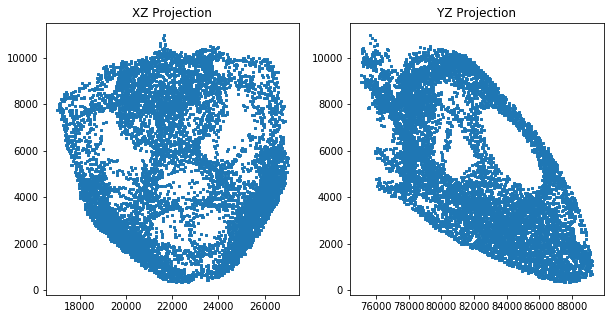

In [3]:
fig, ax = plt.subplots(ncols=2,nrows=1, figsize=(10,5))

ax[0].scatter(mat[:,0],mat[:,2], 5, marker=',')
ax[0].set_title('XZ Projection')

ax[1].scatter(mat[:,1],mat[:,2], 5, marker=',')
ax[1].set_title('YZ Projection')

**Part B**:  It's a little silly to be constrained by the orientation of the object in the XRM itself, since there's no concrete meaning to the X, Y, and Z of the object.  We might ask ourselves if there's a way to re-orient the object and view it form an angle that makes it more clear what it is.

To this end we can employ a **rotation matrix**, code for which is given below.  It uses the aeronautical terms associated with aircraft, which can be hard to understand for a lay person.  Create a small visualization using scatter plots that you believe demonstrate the exact effects of *pitch*, *yaw*, and *roll*.  See also: [wiki](https://en.wikipedia.org/wiki/Aircraft_principal_axes).

**Hint:** You're free to take your own approach here, but I recommend picking one of the 3 projections and then applying a small "rotation" of e.g. 0 pitch, 0 roll, and 30 degree yaw (**What's that in radians?**).  The side-by-side plots of before and after the rotation might show what yaw is, with an accompanying sentence.

In [4]:
def rotate(mat, yaw, pitch, roll):
    r_mat=[[np.cos(yaw)*np.cos(pitch), \
            np.cos(yaw)*np.sin(pitch)*np.sin(roll)- np.sin(yaw)*np.cos(roll),\
            np.cos(yaw)*np.sin(pitch)*np.cos(roll)+np.sin(yaw)*np.sin(roll) ],\
           [np.sin(yaw)*np.cos(pitch), \
            np.sin(yaw)*np.sin(pitch)*np.sin(roll)+ np.cos(yaw)*np.cos(roll),\
            np.sin(yaw)*np.sin(pitch)*np.cos(roll)-np.cos(yaw)*np.sin(roll) ],\
           [-np.sin(pitch), \
            np.cos(pitch)*np.sin(roll),\
            np.cos(pitch)*np.cos(roll)]
          ]
    return np.matmul(mat, r_mat)

In [5]:

rotated=rotate(mat, 0, 30*np.pi/180, 0)

Pitch is counter-clockwise rotation about the Y-axis:


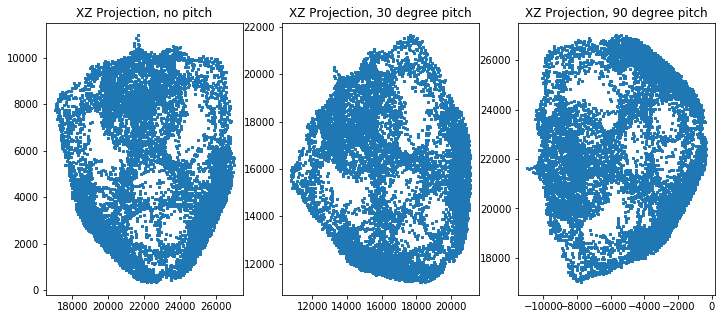

In [6]:
#pitch demonstration
fig, ax = plt.subplots(ncols=3,nrows=1, figsize=(12,5))

ax[0].scatter(mat[:,0],mat[:,2], 5, marker=',')
ax[0].set_title('XZ Projection, no pitch')

rotated=rotate(mat, 0, 30*np.pi/180, 0)
ax[1].scatter(rotated[:,0],rotated[:,2], 5, marker=',')
ax[1].set_title('XZ Projection, 30 degree pitch')


rotated=rotate(mat, 0, 90*np.pi/180, 0)
ax[2].scatter(rotated[:,0],rotated[:,2], 5, marker=',')
ax[2].set_title('XZ Projection, 90 degree pitch')


print('Pitch is counter-clockwise rotation about the Y-axis:')

Yaw is clockwise rotation about the Z-axis:


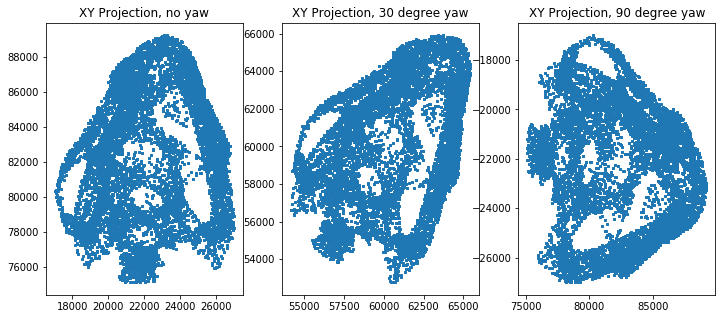

In [7]:
#yaw demonstration

fig, ax = plt.subplots(ncols=3,nrows=1, figsize=(12,5))

ax[0].scatter(mat[:,0],mat[:,1], 5, marker=',')
ax[0].set_title('XY Projection, no yaw')

rotated=rotate(mat, 30*np.pi/180, 0, 0)
ax[1].scatter(rotated[:,0],rotated[:,1], 5, marker=',')
ax[1].set_title('XY Projection, 30 degree yaw')

rotated=rotate(mat, 90*np.pi/180, 0, 0)
ax[2].scatter(rotated[:,0],rotated[:,1], 5, marker=',')
ax[2].set_title('XY Projection, 90 degree yaw')
print('Yaw is clockwise rotation about the Z-axis:')

Yaw is clockwise rotation about the X-axis:


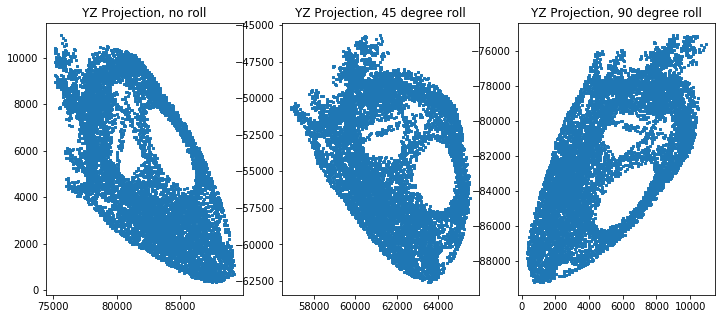

In [8]:
#roll demonstration

fig, ax = plt.subplots(ncols=3,nrows=1, figsize=(12,5))
ax[0].scatter(mat[:,1],mat[:,2], 5, marker=',')
ax[0].set_title('YZ Projection, no roll')

rotated=rotate(mat, 0, 0,45*np.pi/180)
ax[1].scatter(rotated[:,1],rotated[:,2], 5, marker=',')
ax[1].set_title('YZ Projection, 45 degree roll')

rotated=rotate(mat, 0, 0, 90*np.pi/180)
ax[2].scatter(rotated[:,1],rotated[:,2], 5, marker=',')
ax[2].set_title('YZ Projection, 90 degree roll')
print('Yaw is clockwise rotation about the X-axis:')

**Part C**:  A common goal in Data Science might be to come up with the "best" rotation out of all the possible ways.  To this end we will perform the following exercise:

1) Consider rotations where pitch, yaw, and roll are all values taken from the list [0, 30, 45, 60, 90, 120, 135, 150].  For **all $8^3$ such rotations**, create a rotated data set and project it onto the X-Y plane (columns 0 and 1).

2) For each data set in 1), find the ones with the following properties, and plot their post-rotation X-Y projections:

    A) The data set with the smallest minimum-area rectangle necessary to fit the entire object on the XY plane.
    B) The data set with the largest minimum-area rectangle necessary to fit the entire object on the XY plane.
    C) The data set with the largest difference between it's x-dimension range and y-dimension length.
    
Each of the calculations in 2 should be manageable predominantly with calls to `np.min` and `np.max`.

In [9]:
angles=np.linspace(0,150,6)
allangles=np.array([(x, y,z) for x in angles for y in angles for z in angles])

smallXY=np.array([-1,-1,-1])
smallXYsize=np.inf
bigXY=np.array([-1,-1,-1])
bigXYsize=0
longXY=np.array([-1,-1,-1])
longXYsize=0

for i in range(len(allangles)):
    rotated=rotate(mat,allangles[i,0]*np.pi/180, allangles[i,1]*np.pi/180,allangles[i,2]*np.pi/180)
    rotXY=(np.max(rotated[:,0])-np.min(rotated[:,0]))*(np.max(rotated[:,1])-np.min(rotated[:,1]))
    rotdiff=abs((np.max(rotated[:,0])-np.min(rotated[:,0]))-(np.max(rotated[:,1])-np.min(rotated[:,1])))
    if rotXY<smallXYsize:
        smallXYsize=rotXY.copy()
        smallXY[0:3]=allangles[i,:]
    if rotXY>bigXYsize:
        bigXYsize=rotXY.copy()
        bigXY[0:3]=allangles[i,:]
    if rotdiff>longXYsize:
        longXYsize=rotXY.copy()
        longXY[0:3]=allangles[i,:]
        
print(smallXYsize,smallXY)
print(bigXYsize,bigXY)
print(longXYsize,longXY)


71921076.60639279 [120 120  30]
180059021.3269554 [120  60 150]
141509702.93045884 [0 0 0]


Text(0.5,1,'Biggest difference (long and narrow)')

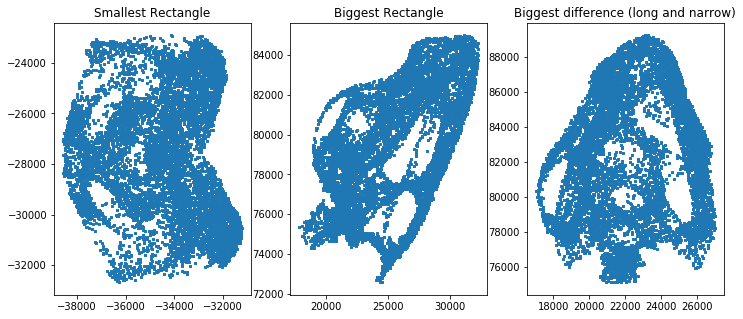

In [10]:

fig, ax = plt.subplots(ncols=3,nrows=1, figsize=(12,5))

rotated=rotate(mat,smallXY[0]*np.pi/180, smallXY[1]*np.pi/180,smallXY[2]*np.pi/180)
ax[0].scatter(rotated[:,0],rotated[:,1], 5, marker=',')
ax[0].set_title('Smallest Rectangle')

rotated=rotate(mat,bigXY[0]*np.pi/180, bigXY[1]*np.pi/180,bigXY[2]*np.pi/180)
ax[1].scatter(rotated[:,0],rotated[:,1], 5, marker=',')
ax[1].set_title('Biggest Rectangle')

rotated=rotate(mat,longXY[0]*np.pi/180, longXY[1]*np.pi/180,longXY[2]*np.pi/180)
ax[2].scatter(rotated[:,0],rotated[:,1], 5, marker=',')
ax[2].set_title('Biggest difference (long and narrow)')

**Part D**: Can you tell what the object actually is?  Are the measures in **Part C** actually good choices of "best" projections, or can you think of some others?  You may describe the features that you think make for a good projection in words.

**Solution**:
It's a skull of some kind!  It's actually a lizard skull.  More on the lizard [here].
(https://www.idigbio.org/portal/records/ee7e75b7-5f22-47b2-a15e-63e7275866fe)

In terms of projections, it's a tough question!  The biggest and smallest boxes didn't help much beyond the original 3 projections.  But in general, we might use measures like that and more complicated ones.  In this case, since it's a hollow object and we're trying to see the shape/structures, a better image probably shows the *holes* in the object, like the ones where the eyes are more visible.  The "smallest rectangle" is probably the **worst** such projection since it has no such nuance.

Here's the dude himself!
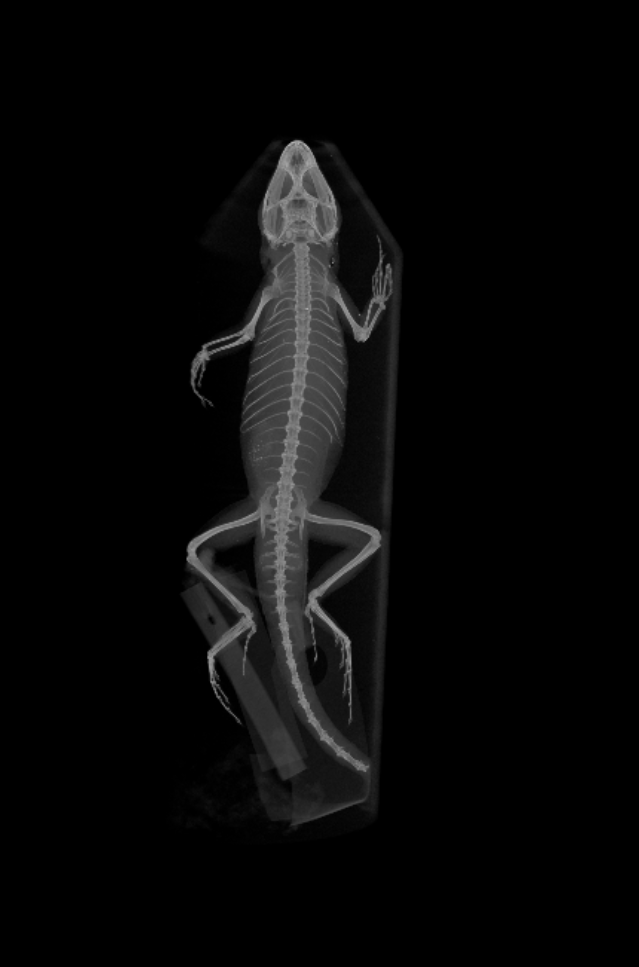

[Back to top](#top)
<a/ id='p2'></a>
## Problem 3 (Hypothesis Simulation; 17 points)
***
One question we will often be tasked with in the semester is asking what "random" looks like.  In hypothesis testing, we typically ask "what is the probability of observing *this* test statistic if everything is fair/random."  We can then do so for a variety of test statistics (`Z`, `T`, proportions, sample variances, etc.) to draw conclusions like "That doesn't look random!  It's extremely unlikely to happen under the **null hypothesis**, so we reject that hypothesis."

As we develop new tools this semester, simulation can help us determine what our tools do if everything is random, which helps provide context to the answers we get on real data - which ideally includes a real signal in it that we want to discover.

Suppose we're about to play a newly invented "game" of chance.

In this game, you:

    1) Roll a single (fair) 6-sided die.  The value of the upward face of the die is your score.
    2) Roll a number of 6-sided dice equal to your score in 1).  Add the value of the upward faces of the die to your score.
    3) Continue to roll a number additional dice equal to exactly what was face-up on your previous roll, adding the result to your score.
    4) If at any time, you've rolled 20 or more dice with the *same* value showing, do not roll again.  Simply add the current result to your score and stop.

Not being in the mood to solve an incredibly tedious discrete probability problem, you decide to *simulate* the game to get a feeling for what a reasonable score is.

One simulation might be:

    1) Zach rolls a '5'.  Score is 5.
    2) Zach rolls '1, 2, 2, 5, 6'.  Add 16, so score is now 21.
    3) Zach rolls 16 dice.  He adds the resulting faces (in this case, 51) to his score, which is now 72.
    4) Zach rolls 51 dice and adds the resulting 163 to his score, making a score of 235.
    5) He rolls once more - 163 dice - adding 500 for a score of 735.  This is his final score, as this last roll included 35 "4's" as the most common die face (and 35 is 20 or more).

**Part A**: Simulate 10,000 "plays" of this game, saving all of the final scores as well as the first roll of each.  Report the average final score.

NB: `np.unique` can be a good way to check if you have 20 or more of one face.

In [11]:
def game():
    score=0
    firstroll=np.random.choice(range(1,7),size=1)
    lastroll=np.sum(firstroll)
    Done=False
    while not Done:
        lastroll=np.random.choice(range(1,7),size=np.sum(lastroll))
        score+=np.sum(lastroll)
        counts=np.unique(lastroll, return_counts=True)[1]
        #print(lastroll);print(counts); print(score)
        if np.max(counts)>19: Done=True
    return float(score), float(firstroll)
game()

(754.0, 4.0)

In [12]:
results=np.array([game() for _ in range(100000)])

In [13]:
np.mean(results[:,0])
pd.Series(results[:,0]).describe()

count    100000.000000
mean        888.974510
std         320.738618
min         190.000000
25%         622.000000
50%         865.000000
75%        1128.000000
max        1900.000000
dtype: float64

**Part B**: Create a density histogram of the final scores.  Label axes, and include a title.  Does this appear to be normally distributed? Why would we care?
    

(array([1.80001800e-06, 2.18002180e-05, 1.29001290e-04, 4.04604046e-04,
        8.14808148e-04, 1.03581036e-03, 1.10521105e-03, 1.02721027e-03,
        1.04721047e-03, 1.05281053e-03, 1.02201022e-03, 1.02101021e-03,
        1.01141011e-03, 1.00941009e-03, 1.01101011e-03, 9.96209962e-04,
        9.29809298e-04, 8.80408804e-04, 8.44608446e-04, 8.09008090e-04,
        7.19007190e-04, 6.39406394e-04, 5.71405714e-04, 5.02205022e-04,
        4.07604076e-04, 3.15003150e-04, 2.41002410e-04, 1.68801688e-04,
        1.21801218e-04, 6.58006580e-05, 4.02004020e-05, 2.00002000e-05,
        9.40009400e-06, 3.00003000e-06, 2.00002000e-07]),
 array([ 200,  250,  300,  350,  400,  450,  500,  550,  600,  650,  700,
         750,  800,  850,  900,  950, 1000, 1050, 1100, 1150, 1200, 1250,
        1300, 1350, 1400, 1450, 1500, 1550, 1600, 1650, 1700, 1750, 1800,
        1850, 1900, 1950]),
 <a list of 35 Patch objects>)

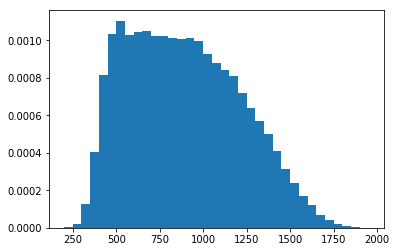

In [14]:
bins=range(200,2000,50)
plt.hist(results[:,0], bins=bins, density=True)


It doesn't look very normal: it has a clear right skew.  As a result, we probably can't use the central limit theorem to describe averages until we have **lots** of games (like $n \geq 30$).

**Part C**: Your friend (who really hates losing) approaches you and says "I'm pretty sure this game is unfair and your dice are loaded.  I played 10 times and my average score was a 500!  There's no way that should happen on fair dice."

**C1**: What is your estimated probability that a single game scores 500 or less?
    
**C2**: What would you estimate the probability to be that an average score of 10 games is 500 or less?
     
**C3**: Suppose we were to create a 1-tailed hypothesis test of the form "I reject the null hypothesis that fair dice were used if a set of 10 games has an average score less than or equal to $c$."  What would you choose for $c$ if you wanted a probability of Type I error of .01 or less?

**C4**: What do you tell your friend?

C1: Estimated P(Single game <501)= 0.12154
C2: Estimated P(10-set mean <501)= 0.0001
C3: 1% min cutoff for sets of 10 666.795


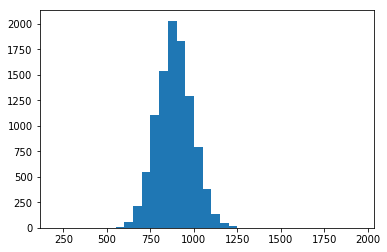

In [15]:
print('C1: Estimated P(Single game <501)=', np.sum(results[:,0]<501)/len(results[:,0]))

setsof10=np.reshape(results[:,0], (-1,10))
meansof10=np.mean(setsof10,1)
bins=range(200,2000,50)
plt.hist(meansof10, bins=bins)

print('C2: Estimated P(10-set mean <501)=', np.sum(meansof10<501)/len(meansof10))
print('C3: 1% min cutoff for sets of 10', np.percentile(meansof10,1))


**C4**: Our friend is certainly very unlucky, as none of the 1000 sets of 10 were as low as 500, although 12% of single games were that low.  From a hypothesis testing standpoint, we would *reject* the hypothesis that your friend was playing a fair game in favor of an alternative where they were somehow coming from a lower score distribution.

**Part D**: You decide that if you wanted to cheat your friend, it would make way more sense to weight the *first* die roll than try to find tens or hundreds of weighted dice.  Carefully justifying your answer with both numerical and visual results, how would you weight the die on the *first* roll to **minimize** your friends score?

Average score for a first roll of:  1  was  897.0227682326084
Average score for a first roll of:  2  was  842.0490295008013
Average score for a first roll of:  3  was  778.1235469539286
Average score for a first roll of:  4  was  858.132216678546
Average score for a first roll of:  5  was  966.6900999091735
Average score for a first roll of:  6  was  991.4416143497758


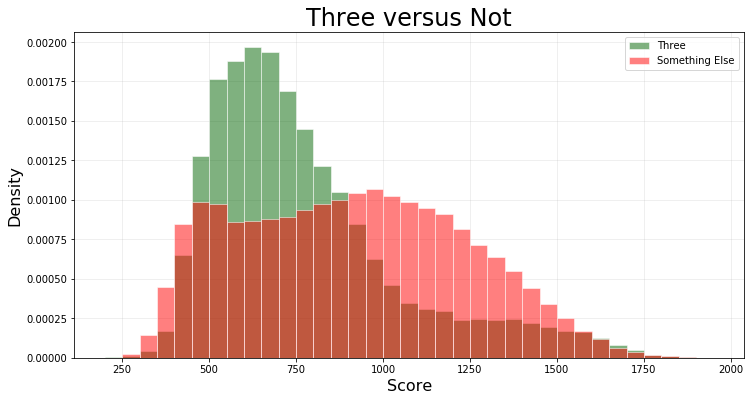

In [16]:
values=range(1,7,1)
for val in values:
    print('Average score for a first roll of: ', val, ' was ', np.mean(results[results[:,1]==val,0]))

    
fig, ax = plt.subplots(figsize=(12,6))
threes=results[results[:,1]==3,0]
notthree=results[results[:,1]!=3,0]
plt.hist(threes, facecolor="darkgreen", edgecolor="white",bins=bins, alpha=0.5, label="Three", density=True)
plt.hist(notthree, facecolor="red", edgecolor="white",bins=bins, alpha=0.5, label="Something Else", density=True)


ax.set_xlabel("Score", fontsize=16)
ax.set_ylabel("Density", fontsize=16)
ax.set_title("Three versus Not", fontsize=24)
ax.grid(alpha=0.25)
ax.set_axisbelow(True)
ax.legend();